In [79]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [80]:
path = 'dataset-files/'

In [81]:
olist_customer = pd.read_csv(path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
olist_order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
olist_orders = pd.read_csv(path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')

# Conteúdo

* [Conhecendo os Dataframes](#knowing)
* [Limpando os Dados](#cleaning)
    * [Mudando Tipos de Dados](#changing)
    * [Removendo Colunas](#removing-columns)
    * [Removendo Linhas](#removing-lines)
    * [Identificando Outliers](#identifying)
* [Categorias Com Maior e Menor Receita dos Últimos 12 Meses](#last-twelve)
    * [Top 10 Categorias Com Maior Receita](#last-twelve-best)
    * [Top 10 Categorias Com Pior Receita](#last-twelve-worst)
* [Top 10 Sellers Com Maior Receita](#best-revenue-sellers)
* [Top 10 Sellers Com Pior Receita](#worst-revenue-sellers)
* [Sellers que Vendem o Mesmo Produto](#same-product)
    * [Variação de Preço Entre os Sellers](#different-prices)
* [EXTRA](#extra)
* [Inflação de Preços](#inflation)
* [Top 10 Sellers Com Melhores Avaliações](#best-reviews)
* [Top 10 Sellers Com Piores Avaliações](#worst-reviews)
* [Relação Entre Quantidade de Vendas e Quantidade de Reviews](#reviews-sales)

# Conhecendo os Dataframes <a id="knowing"></a>

In [82]:
olist_customer.info()
olist_customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [83]:
olist_geolocation.info()
olist_geolocation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [84]:
olist_order_items.info()
olist_order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [85]:
olist_order_payments.info()
olist_order_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [86]:
olist_order_reviews.info()
olist_order_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [87]:
olist_orders.info()
olist_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [88]:
olist_products.info()
olist_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [89]:
olist_sellers.info()
olist_sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Limpando os Dados<a id="cleaning"></a>

### Mudando Tipos de Dados <a id="changing"></a>
Para facilitar o trabalho com as datas, faz-se necessário alterar os tipos desses dados de objeto para datetime.

In [90]:
olist_order_items['shipping_limit_date'] = pd.to_datetime(olist_order_items['shipping_limit_date'])
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [91]:
olist_order_reviews[['review_creation_date', 'review_answer_timestamp']] = \
olist_order_reviews[['review_creation_date', 'review_answer_timestamp']].apply(pd.to_datetime)

olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [92]:
olist_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = \
olist_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]\
.apply(pd.to_datetime)
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Removendo Colunas <a id="removing-columns">

As mensagens sobre as avaliações, bem como os seus títulos não serão apreciadas nessa análise, e portanto, devem ser removidas.

In [93]:
olist_order_reviews.drop(columns = ["review_comment_title", "review_comment_message"], inplace=True)

In [94]:
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [95]:
df_products = olist_products.drop(columns = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"])
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


### Removendo Linhas<a id="removing-lines"></a>
A fim de igualar a coluna 'product_id' com as demais, é necessário remover algumas linhas. Foi escolhida essa via, uma vez que a coluna 'product_id' é a única que contém informações, restando todas as demais vazias, e isso faz com que essas informações não tenham muita utilidade para a análise.

In [96]:
row_non_null_counts = df_products.notnull().sum(axis=1)
df_products = df_products[row_non_null_counts > 1]
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


### Identificando Outliers<a id="identifying"></a>

Parece haver alguns outliers em vários dataframes. Alguns deles foram ignorados por não atrapalharem nas avaliações que serão feitas.

In [97]:
olist_order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Parece haver uma diferença significativa no preço de alguns itens. Tanto no valor mínimo quanto máximo.

<Axes: >

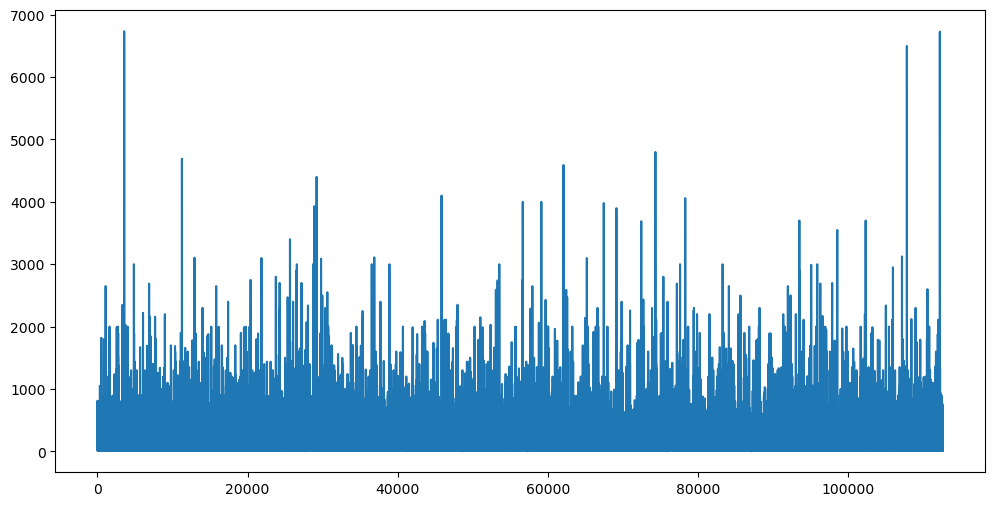

In [98]:
plt.figure(figsize = (12,6))
olist_order_items.price.plot()

Em relação ao menor valor (de 0,85 centavos), embora discrepe significativamente do valor pago no frete, a princípio não parece ser um engano de digitação. Podemos ver que o valor se refere a um mesmo produto, em datas muito próximas, o que parece mais indicar que o produto entrou em promoção e o consumidor só teria que arcar com o custo do frete.

Menos ainda pode-se suspeitar dos valores mais altos, uma vez que estão de acordo com o valor de produtos vendidos no mercado. Assim, tais valores serão mantidos.

In [99]:
olist_order_items.sort_values("price")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
...,...,...,...,...,...,...,...
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [100]:
olist_orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [101]:
olist_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [102]:
olist_orders['order_approved_at'].isna().sum()

160

Parece haver uma quantidade significativa de produtos em que não se sabe se foram entregues ou não. Os status constam como 'unavailable', 'invoiced', 'processing', 'created' e 'approved'. Decidi por alterá-los todos em uma única categoria: 'pending'.

In [103]:
created = olist_orders[olist_orders['order_status'] == 'created']
created

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [104]:
olist_orders_filtrado = olist_orders.copy()

olist_orders_filtrado['order_status'].replace({'unavailable': 'pending', 'invoiced': 'pending', 'processing': 'pending', 'created': 'pending', 'approved': 'pending'}, inplace=True)

olist_orders_filtrado['order_status'].value_counts()

order_status
delivered    96478
pending       1231
shipped       1107
canceled       625
Name: count, dtype: int64

In [105]:
olist_orders_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


E agora, podemos alterar a forma como os valores em 'order_status' estão armazenados, a fim de melhorar o uso da memória. Com isso, baixamos o uso de 6.1+ MB para 5.4+ MB.

In [106]:
olist_orders_filtrado.order_status = olist_orders_filtrado.order_status.astype("category")
olist_orders_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [107]:
# refazendo a operação de mudança de tipo de dado para a datas...
olist_orders_filtrado[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = \
olist_orders_filtrado[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]\
.apply(pd.to_datetime)
olist_orders_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


# Categorias Com Maior e Menor Receita dos Últimos 12 Meses<a id="last-twelve"></a>

Usarei a data de compra como referência para responder esta pergunta. Primeiro, devem-se unir 'olist_orders_filtrado' com 'olist_order_items' pelo 'order_id', para relacionar a data de compra com o preço.

In [108]:
preco_e_data = pd.merge(olist_order_items, olist_orders_filtrado, on='order_id')
preco_e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  category      
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  datetime64[ns]
 11  

Em seguida, precisamos unir o resultado acima com df_products, para fazer a análise por categorias.

In [109]:
preco_por_categoria = pd.merge(preco_e_data, df_products, on='product_id')

preco_por_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111047 entries, 0 to 111046
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111047 non-null  object        
 1   order_item_id                  111047 non-null  int64         
 2   product_id                     111047 non-null  object        
 3   seller_id                      111047 non-null  object        
 4   shipping_limit_date            111047 non-null  datetime64[ns]
 5   price                          111047 non-null  float64       
 6   freight_value                  111047 non-null  float64       
 7   customer_id                    111047 non-null  object        
 8   order_status                   111047 non-null  category      
 9   order_purchase_timestamp       111047 non-null  datetime64[ns]
 10  order_approved_at              111033 non-null  datetime64[ns]
 11  

E então, selecionamos apenas os últimos 12 meses, considerando o dia mais recente como 03/09/2018, que é o último dia contido na tabela.

In [110]:
ha_doze_meses = (pd.Timestamp('2018-09-03 09:06:57') - pd.Timedelta(365, "d"))#.strftime('%Y-%m-%d %H:%M:%S') 
ultimos_12_meses = preco_por_categoria[preco_por_categoria['order_purchase_timestamp'] >= ha_doze_meses]


In [111]:
ultimos_12_meses.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,cool_stuff,58.0,598.0,4.0
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-03-26 03:28:44,64.9,38.50,c32c207d9ebf75958011557ac1624e2f,delivered,2018-03-18 21:00:44,2018-03-20 03:28:44,2018-03-20 18:08:45,2018-03-28 21:57:44,2018-04-12,cool_stuff,58.0,598.0,4.0
10,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,moveis_decoracao,59.0,695.0,2.0
11,45211f00dfa76aed1c20d6910d973222,2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2017-11-06 15:46:14,199.0,20.08,903ac1be571f2dc655f9083ffc936ce6,delivered,2017-10-30 15:35:32,2017-10-30 17:31:35,2017-10-31 20:36:37,2017-11-08 17:34:39,2017-11-24,moveis_decoracao,59.0,695.0,2.0


In [112]:
categoria_soma_preco = ultimos_12_meses.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

## Top 10 Categorias Com Maior Receita <a id="last-twelve-best"></a>

In [185]:
melhores_cat = categoria_soma_preco.head(10)
melhores_cat

product_category_name
beleza_saude              1003548.12
relogios_presentes         987238.61
cama_mesa_banho            774483.45
esporte_lazer              754111.67
informatica_acessorios     687562.56
moveis_decoracao           540737.22
utilidades_domesticas      495849.44
automotivo                 457494.42
cool_stuff                 416885.66
brinquedos                 356850.42
Name: price, dtype: float64

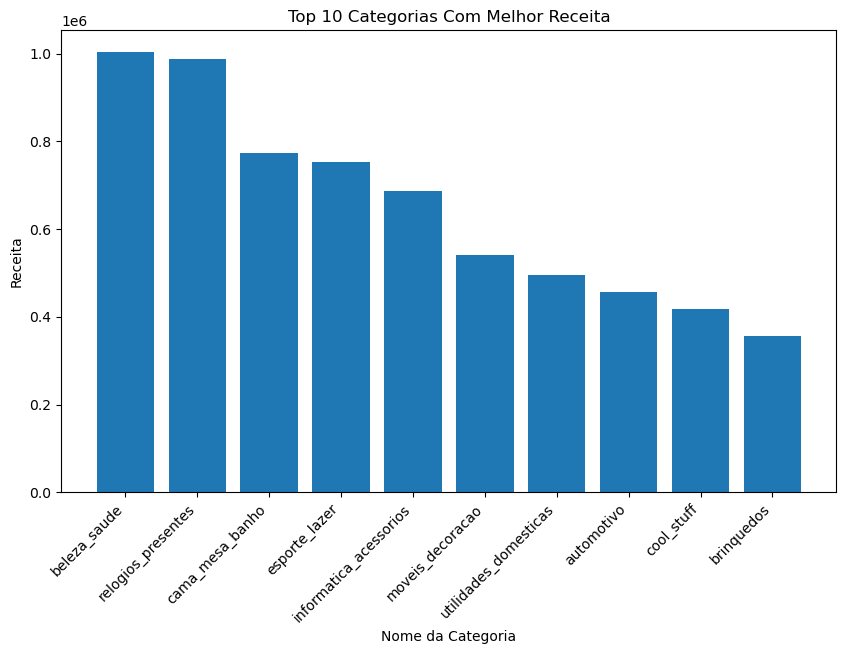

In [187]:
df_melhores_cat = pd.DataFrame(list(melhores_cat.items()), columns=['product_category_name', 'price'])

plt.figure(figsize=(10, 6))
plt.bar(df_melhores_cat['product_category_name'], df_melhores_cat['price'])
plt.title('Top 10 Categorias Com Melhor Receita')
plt.xlabel('Nome da Categoria')
plt.ylabel('Receita')
plt.xticks(rotation=45, ha='right') 
# plt.tight_layout()
plt.show()

## Top 10 Categorias Com Pior Receita <a id="last-twelve-worst"></a>

In [180]:
piores_categorias = categoria_soma_preco.sort_values()
piores_categorias.head(10)

product_category_name
seguros_e_servicos                100.00
casa_conforto_2                   267.19
fashion_roupa_infanto_juvenil     299.95
cds_dvds_musicais                 370.00
fashion_esporte                   933.80
pc_gamer                         1025.99
fashion_roupa_feminina           1052.24
la_cuisine                       1055.00
flores                           1110.04
fraldas_higiene                  1432.69
Name: price, dtype: float64

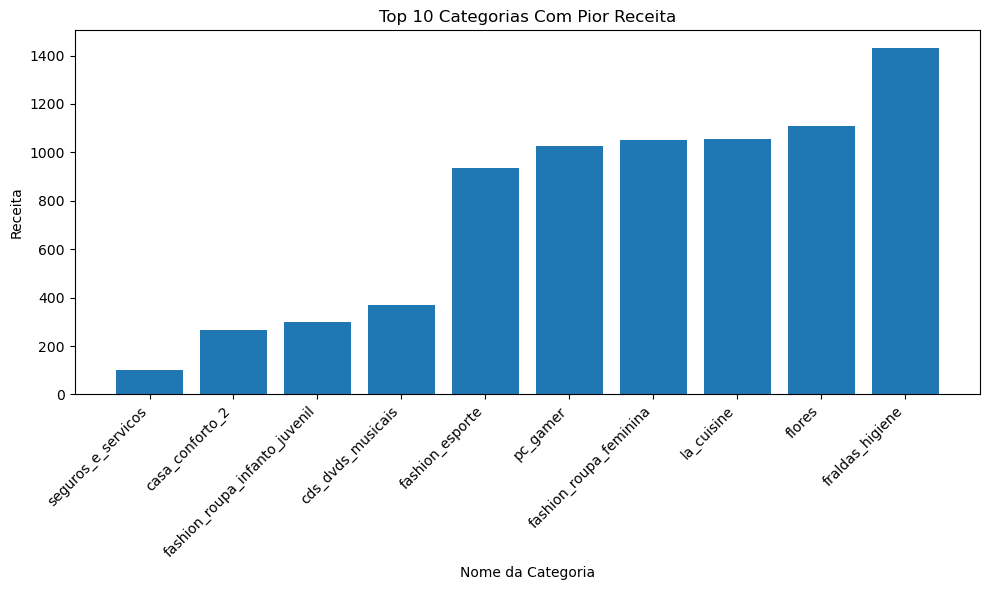

In [183]:
piores_cat = piores_categorias.head(10)

df_piores_cat = pd.DataFrame(list(piores_cat.items()), columns=['product_category_name', 'price'])

plt.figure(figsize=(10, 6))
plt.bar(df_piores_cat['product_category_name'], df_piores_cat['price'])
plt.title('Top 10 Categorias Com Pior Receita')
plt.xlabel('Nome da Categoria')
plt.ylabel('Receita')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Top 10 Sellers Com Maior Receita <a id="best-revenue-sellers">

In [171]:
receita_sellers = preco_por_categoria.groupby('seller_id')['price'].sum().sort_values(ascending=False)
melhores_sellers_rec = receita_sellers.head(10)
melhores_sellers_rec

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
7e93a43ef30c4f03f38b393420bc753a    176431.87
da8622b14eb17ae2831f4ac5b9dab84a    160236.57
7a67c85e85bb2ce8582c35f2203ad736    141745.53
1025f0e2d44d7041d6cf58b6550e0bfa    138968.55
955fee9216a65b617aa5c0531780ce60    135171.70
Name: price, dtype: float64

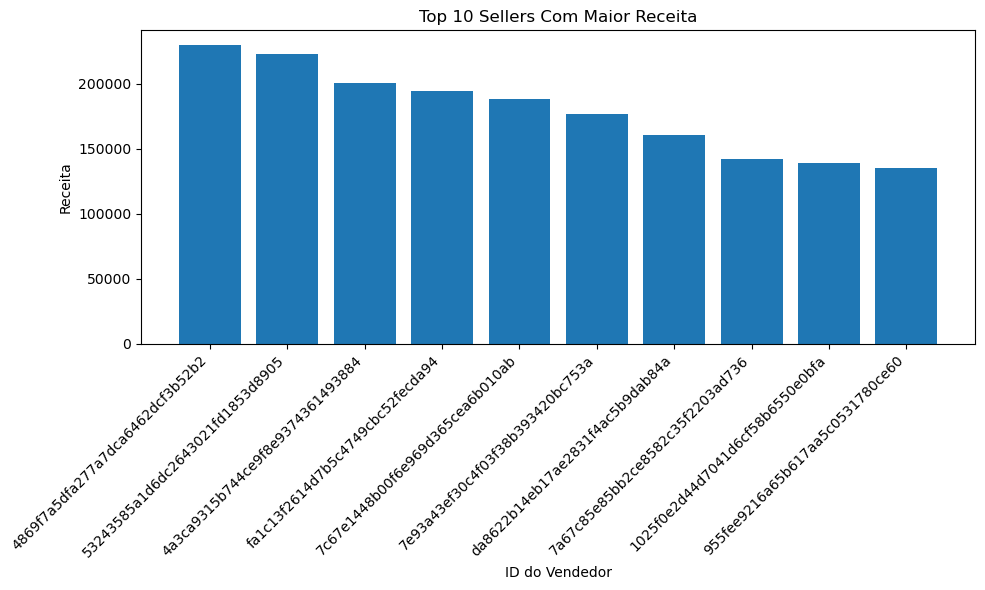

In [184]:
df_receita_sellers = pd.DataFrame(list(melhores_sellers_rec.items()), columns=['seller_id', 'receita'])

plt.figure(figsize=(10, 6))
plt.bar(df_receita_sellers['seller_id'], df_receita_sellers['receita'])
plt.title('Top 10 Sellers Com Maior Receita')
plt.xlabel('ID do Vendedor')
plt.ylabel('Receita')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Top 10 Sellers Com Pior Receita <a id="worst-revenue-sellers">

In [167]:
receita_sellers = preco_por_categoria.groupby('seller_id')['price'].sum().sort_values()
piores_sellers_rec = receita_sellers.head(10)
piores_sellers_rec

seller_id
cf6f6bc4df3999b9c6440f124fb2f687     3.50
77128dec4bec4878c37ab7d6169d6f26     6.50
1fa2d3def6adfa70e58c276bb64fe5bb     6.90
34aefe746cd81b7f3b23253ea28bef39     8.00
ad14615bdd492b01b0d97922e87cb87f     8.25
4965a7002cca77301c82d3f91b82e1a9     8.49
0f94588695d71662beec8d883ffacf09     9.00
c18309219e789960add0b2255ca4b091     9.90
95cca791657aabeff15a07eb152d7841     9.99
344223b2a90784f64136a8a5da012e7f    10.90
Name: price, dtype: float64

Abaixo, podemos ver as informações em um gráfico:

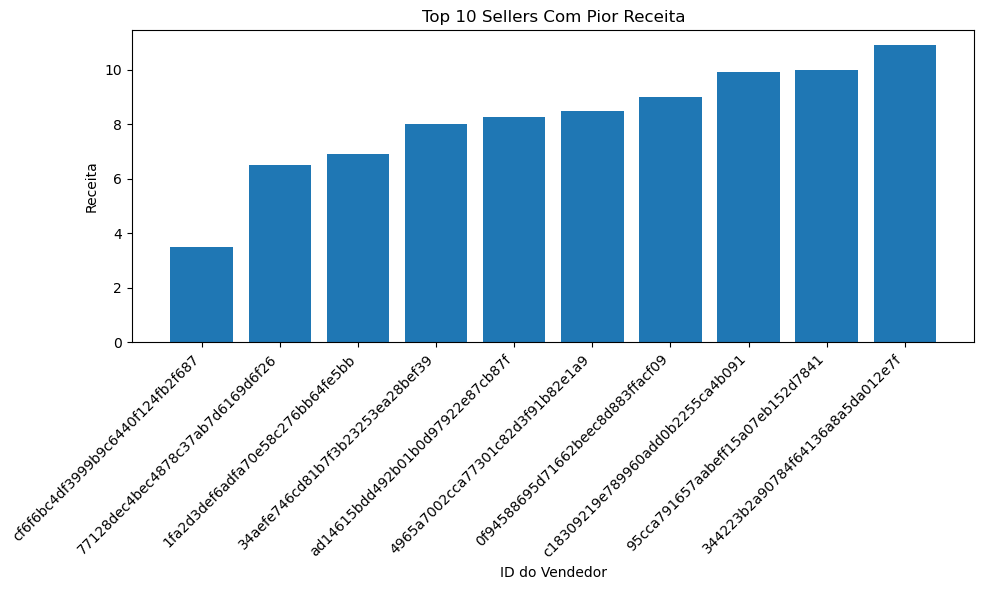

In [172]:
df_receita_sellers = pd.DataFrame(list(piores_sellers_rec.items()), columns=['seller_id', 'receita'])

plt.figure(figsize=(10, 6))
plt.bar(df_receita_sellers['seller_id'], df_receita_sellers['receita'])
plt.title('Top 10 Sellers Com Pior Receita')
plt.xlabel('ID do Vendedor')
plt.ylabel('Receita')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Sellers Que Vendem o Mesmo Produto<a id="same-product"></a>

Abaixo podemos ver os produtos que possuem mais de um seller.

In [147]:
# Contei os valores únicos de seller_id para cada product_id
seller_contagem = preco_por_categoria.groupby('product_id')['seller_id'].nunique()

# Filtrei os product_id com mais de um seller
produtos_com_multiplos_sellers = seller_contagem[seller_contagem > 1].index

# Filtrei o DataFrame original apenas para os product_id com múltiplos sellers
df_filtrada = preco_por_categoria[preco_por_categoria['product_id'].isin(produtos_com_multiplos_sellers)]

# Mantive apenas os valores únicos de seller_id para cada product_id
produto_por_seller = df_filtrada.drop_duplicates(subset=['product_id', 'seller_id'])

# Contei o número de sellers para cada product_id
contagem_sellers = produto_por_seller.groupby('product_id').size()

# Classifiquei o DataFrame com base no número de sellers em ordem decrescente
produto_por_seller = produto_por_seller.set_index(['product_id', 'seller_id'])
produto_por_seller = produto_por_seller.reindex(contagem_sellers.sort_values(ascending=False).index, level='product_id')

produto_por_seller.head(20)

order_id  \
product_id                       seller_id                                                            
d285360f29ac7fd97640bf0baef03de0 2eb70248d66e0e3ef83659f71b244378  027b81ccdf72434e7346aafdf630ff31   
                                 4869f7a5dfa277a7dca6462dcf3b52b2  0dcaff4e23cee08bff0fe78261d1baaa   
                                 d650b663c3b5f6fb392b6326366efa9a  10c64a2e69f00b07c2fdc81d3e62951e   
                                 b33e7c55446eabf8fe1a42d037ac7d6d  10cb203e7598cb11350267c0600fc00d   
                                 fa1c13f2614d7b5c4749cbc52fecda94  1441bdf56d9316c4649d04ecf5055bf5   
                                 7d13fca15225358621be4086e1eb0964  33dc68ee07456f6fa5da352d9cca5d93   
                                 7e93a43ef30c4f03f38b393420bc753a  59f0c755f151fc512bfc8a38e3b192ba   
                                 01ed254b9ff8407dfb9d99ba1e17d923  5a94fd90d3f89448e9e870e7cec75c52   
69455f41626a745aea9ee9164cb9eafd bce6a5ecf98e99fd2a8868b15c51f04b  00ba57ae98928df6ba6ec9d3d8d4b1b7   
                                 2eb70248d66e0e3ef83659f71b244378  13f12afcd38859a0ce8e667475326c44   
                                 4869f7a5dfa277a7dca6462dcf3b52b2  15faad2f4dd5cdf1bceb9b8fac8f137a   
                                 58f1a6197ed863543e0136bdedb3fce2  18137b5db086c8612160066abecac8a7   
                                 c60b801f2d52c7f7f91de00870882a75  1a6999c021291137f10864ddb9710172   
                                 7d13fca15225358621be4086e1eb0964  2ca4efdc485d435bf550022118cb95db   
                                 b33e7c55446eabf8fe1a42d037ac7d6d  5533f1edcb0023c063b64b627abc4024   
                                 7e93a43ef30c4f03f38b393420bc753a  5cbaf38c240e82434c90a2148f37e94b   
4298b7e67dc399c200662b569563a2b2 88460e8ebdecbfecb5f9601833981930  08d61eb463e165c095e7de595a773d90   
                                 9c0e69c7bf2619675bbadf47b43f655a  109b43dc12d67a5107cbbfb7fe98d0ae   
                                 4b5f66b7adcf57f1ecc0d3c07dd6b177  16c94c833d565079bc2b35b78a99b3e7   
                                 3bb548e3cb7f70f28e3f11ee9dce0e59  2f730a899936d8cce7319fb4f6d0cd5a   

                                                                   order_item_id  \
product_id                       seller_id                                         
d285360f29ac7fd97640bf0baef03de0 2eb70248d66e0e3ef83659f71b244378              1   
                                 4869f7a5dfa277a7dca6462dcf3b52b2              1   
                                 d650b663c3b5f6fb392b6326366efa9a              1   
                                 b33e7c55446eabf8fe1a42d037ac7d6d              1   
                                 fa1c13f2614d7b5c4749cbc52fecda94              1   
                                 7d13fca15225358621be4086e1eb0964              1   
                                 7e93a43ef30c4f03f38b393420bc753a              1   
                                 01ed254b9ff8407dfb9d99ba1e17d923              1   
69455f41626a745aea9ee9164cb9eafd bce6a5ecf98e99fd2a8868b15c51f04b              1   
                                 2eb70248d66e0e3ef83659f71b244378              1   
                                 4869f7a5dfa277a7dca6462dcf3b52b2              1   
                                 58f1a6197ed863543e0136bdedb3fce2              2   
                                 c60b801f2d52c7f7f91de00870882a75              1   
                                 7d13fca15225358621be4086e1eb0964              1   
                                 b33e7c55446eabf8fe1a42d037ac7d6d              1   
                                 7e93a43ef30c4f03f38b393420bc753a              1   
4298b7e67dc399c200662b569563a2b2 88460e8ebdecbfecb5f9601833981930              1   
                                 9c0e69c7bf2619675bbadf47b43f655a              1   
                                 4b5f66b7adcf57f1ecc0d3c07dd6b177              1   
                                 3bb548e3cb7f70f28e3f11ee9dc

In [148]:
produto_por_seller.tail(20)

order_id  \
product_id                       seller_id                                                            
5a4ad40b009d7b9aed160df860afffec 7142540dd4c91e2237acb7e911c4eba2  1dcc7dd4a1b9d03d263d4b4d224f1cc6   
                                 34056b8b55c1775a22af2331670a799c  35ca13a1178f68d06aeb72c659c67caf   
5a719c85a2cad2da6076ea511aa4023f 3340ef1913fb70d28420f6ceb685c339  3f41fd6ddaad5817115c0d99360ad3e6   
                                 9c0e69c7bf2619675bbadf47b43f655a  a78de2cc0d6bc691e86e944979c373eb   
5a7373ba4c9b3e13513ded06cd1986c4 9b013e03b2ab786505a1d3b5c0756754  1ddbde4b8d3dc88ae08a92c7ecf6c2f7   
                                 e9779976487b77c6d4ac45f75ec7afe9  3dbe04fd06c3b63be0dae1902b9013c2   
5add6c33b03c128b413ddfb2ac185a56 26562f211dd1364af2a8596dc945e8ae  58d3bf26c43675cdcc1a3ac391c06dfc   
                                 f049a72cf58fd31b11f8919cade515e7  dda0996054bec18cafa1ede0d62dd3cb   
5afde944579b289b99c1ee420b2ad73d 620c87c171fb2a6dd6e8bb4dec959fc6  23b9942cd2a096775ed2ac048559bec2   
                                 6eb94e1466490d327a09abf8f3552a50  65cc9958974d9b84cb4caad96226d10f   
5b3aa845bba5aa7ba1216e36ae882cfa 8b28d096634035667e8263d57ba3368c  008a1b3db2a8bf63418c2cf7c7f494b1   
                                 7178f9f4dd81dcef02f62acdf8151e01  27305b6f34b0b06a5323934d520c62b4   
5b8423dc7f23089c9c59c5d140eb5a1c c8b3445d737de6befde0c88ede534a5e  02e20d5cc0d1df880e43ab3ed50a238b   
                                 a3a38f4affed601eb87a97788c949667  059a13b49c0fb6d21e423fad48ad1c44   
5b8a5a9417210b1b84b67b9a7aefb935 f457c46070d02cadd8a68551231220dd  0df7ce137bbb12afe0a4e2643c6c43ee   
                                 8e6d7754bc7e0f22c96d255ebda59eba  0f5eab9ad693ad60f23eddb4338d4a20   
5c92f9ec6027c92a5293a46e9175e817 6a8a889bde935bafa76d7848782dfaf9  124e62fecaaf83248e7f9a84c441f7d4   
                                 4be6b962d83299498bae2190f95d6566  391b367d6be6ee89d19e3e314606012c   
ffd34459c21034d1da6df9800de0d7a3 11bfa66332777660bd0640ee84d47006  02623e799dcc1e41066ddfe4af591f24   
                                 a416b6a846a11724393025641d4edd5e  eb4d305848989350701a75e1cb3c0a93   

                                                                   order_item_id  \
product_id                       seller_id                                         
5a4ad40b009d7b9aed160df860afffec 7142540dd4c91e2237acb7e911c4eba2              1   
                                 34056b8b55c1775a22af2331670a799c              1   
5a719c85a2cad2da6076ea511aa4023f 3340ef1913fb70d28420f6ceb685c339              1   
                                 9c0e69c7bf2619675bbadf47b43f655a              1   
5a7373ba4c9b3e13513ded06cd1986c4 9b013e03b2ab786505a1d3b5c0756754              1   
                                 e9779976487b77c6d4ac45f75ec7afe9              1   
5add6c33b03c128b413ddfb2ac185a56 26562f211dd1364af2a8596dc945e8ae              1   
                                 f049a72cf58fd31b11f8919cade515e7              3   
5afde944579b289b99c1ee420b2ad73d 620c87c171fb2a6dd6e8bb4dec959fc6              1   
                                 6eb94e1466490d327a09abf8f3552a50              1   
5b3aa845bba5aa7ba1216e36ae882cfa 8b28d096634035667e8263d57ba3368c              1   
                                 7178f9f4dd81dcef02f62acdf8151e01              1   
5b8423dc7f23089c9c59c5d140eb5a1c c8b3445d737de6befde0c88ede534a5e              1   
                                 a3a38f4affed601eb87a97788c949667              1   
5b8a5a9417210b1b84b67b9a7aefb935 f457c46070d02cadd8a68551231220dd              3   
                                 8e6d7754bc7e0f22c96d255ebda59eba              1   
5c92f9ec6027c92a5293a46e9175e817 6a8a889bde935bafa76d7848782dfaf9              1   
                                 4be6b962d83299498bae2190f95d6566              1   
ffd34459c21034d1da6df9800de0d7a3 11bfa66332777660bd0640ee84d47006              1   
                                 a416b6a846a11724393025641d4

Como podemos ver, a maior quantidade que temos é de 8 sellers por produto, e a menor, de 2 sellers por produto. Abaixo, apresento um gráfico com os 30 produtos com maior quantidade de sellers:

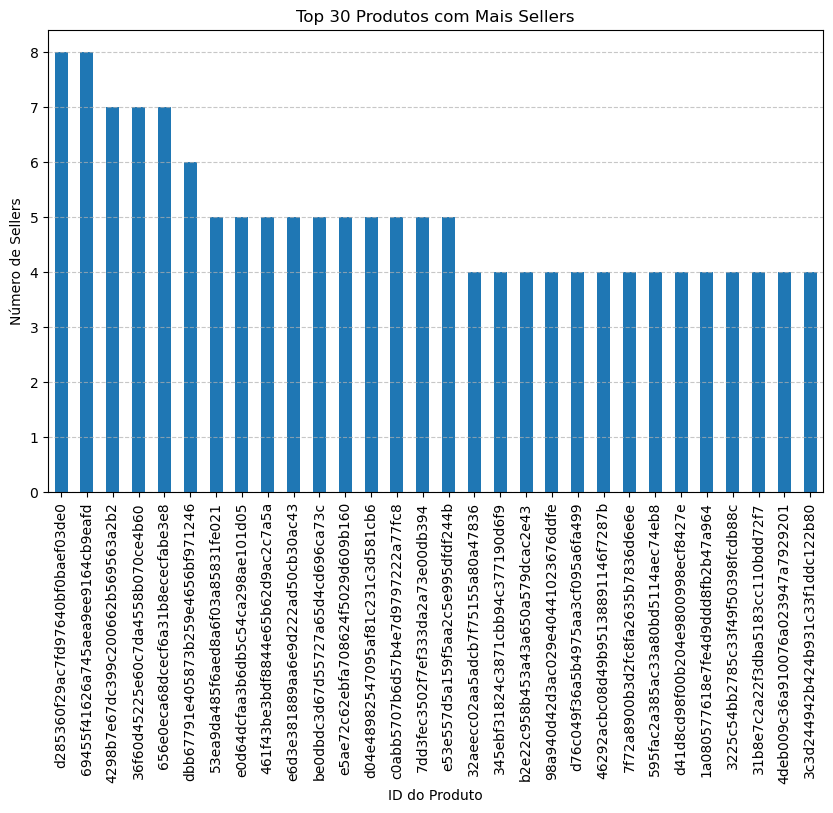

In [164]:
# Agrupei e contei o número de sellers únicos para cada produto
produtos_por_sellers = produto_por_seller.reset_index().groupby('product_id')['seller_id'].nunique()

# Ordenei em ordem decrescente pelo número de sellers
produtos_por_sellers = produtos_por_sellers.sort_values(ascending=False)

# Selecionei os 30 produtos com mais sellers
top_30_produtos = produtos_por_sellers.head(30)

plt.figure(figsize=(10, 6))
top_30_produtos.plot(kind='bar')
plt.title('Top 30 Produtos com Mais Sellers')
plt.xlabel('ID do Produto')
plt.ylabel('Número de Sellers')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [137]:
u = produto_por_seller.sort_values('seller_id')
u.head(30)

order_id  \
product_id                       seller_id                                                            
98a8c2fa16d7239c606640f5555768e4 001cca7ae9ae17fb1caed9dfb1094831  5f303c97922b4eed59bca1e3b503f984   
                                 001cca7ae9ae17fb1caed9dfb1094831  83d67fe6be9a0ed962f9ce12a1accdf3   
                                 001cca7ae9ae17fb1caed9dfb1094831  785bfd330f7cc6cfba69cf7ee360fe47   
                                 001cca7ae9ae17fb1caed9dfb1094831  722472fb65236469ae8a7934269a980f   
                                 001cca7ae9ae17fb1caed9dfb1094831  6cc81d57e84149f55788bccafc8a48d3   
                                 001cca7ae9ae17fb1caed9dfb1094831  6b34bb840d9211dc1a1f94e049a79de4   
                                 001cca7ae9ae17fb1caed9dfb1094831  681fc152c63481373cecdd46e390fe6b   
                                 001cca7ae9ae17fb1caed9dfb1094831  67228d3b35b57e5bf9c1437f95652f2c   
                                 001cca7ae9ae17fb1caed9dfb1094831  08d55c0e173bdfa5770a50a253b1810f   
                                 001cca7ae9ae17fb1caed9dfb1094831  8f7176f38b6ac3f5e924b9b05716440c   
                                 001cca7ae9ae17fb1caed9dfb1094831  5f303c97922b4eed59bca1e3b503f984   
                                 001cca7ae9ae17fb1caed9dfb1094831  51a7d7d26116c0eaee6bb35ea667dfda   
                                 001cca7ae9ae17fb1caed9dfb1094831  4ceda92a516e1a970460bedc58d3431d   
                                 001cca7ae9ae17fb1caed9dfb1094831  3e4c2286500a9d3194bd7d92434c8233   
                                 001cca7ae9ae17fb1caed9dfb1094831  31570df15e703d337b7b8a1d1ddcab6b   
                                 001cca7ae9ae17fb1caed9dfb1094831  2f000c3fe98bfb40a47105b66f081368   
                                 001cca7ae9ae17fb1caed9dfb1094831  28d030cdc8a0c663dc60bbe5a730971f   
                                 001cca7ae9ae17fb1caed9dfb1094831  0aed18a03ea2ccdb5981aea3524b304d   
                                 001cca7ae9ae17fb1caed9dfb1094831  27996b768ff5774e22bb47c13cb1c55b   
                                 001cca7ae9ae17fb1caed9dfb1094831  5d8d75278e117304f2e8c3df4ce3c41c   
                                 001cca7ae9ae17fb1caed9dfb1094831  8f7176f38b6ac3f5e924b9b05716440c   
                                 001cca7ae9ae17fb1caed9dfb1094831  0d6fbe13e1bee14aa67cfcda25ee1781   
                                 001cca7ae9ae17fb1caed9dfb1094831  9b9e08cb1a66ae45d2a91815cd8f4426   
                                 001cca7ae9ae17fb1caed9dfb1094831  d0b446af99e79a960dd8c63777fc65df   
                                 001cca7ae9ae17fb1caed9dfb1094831  d6ee6e570c72b3abf832d6427e06627e   
                                 001cca7ae9ae17fb1caed9dfb1094831  dac8bbf73624993402c1e7481bb37ee5   
                                 001cca7ae9ae17fb1caed9dfb1094831  e0491d5fa20ffe7ac96ccfdb874a8dc1   
                                 001cca7ae9ae17fb1caed9dfb1094831  e73eff9d5a06990f389e11a7f731af85   
                                 001cca7ae9ae17fb1caed9dfb1094831  eac76692452422620996fe5e1a7f8bb0   
                                 001cca7ae9ae17fb1caed9dfb1094831  9b9e08cb1a66ae45d2a91815cd8f4426   

                                                                   order_item_id  \
product_id                       seller_id                                         
98a8c2fa16d7239c606640f5555768e4 001cca7ae9ae17fb1caed9dfb1094831              2   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cca7ae9ae17fb1caed9dfb1094831              1   
                                 001cc

In [41]:
# filtrando a tabela com as categorias dos produtos usando a ```top 30 produtos com mais sellers```. 
produto_por_seller_filtrado = produto_por_seller[produto_por_seller.index.get_level_values('product_id').isin(seller_contagem_top_30_ordenada.index)]
produto_por_seller_filtrado.info()



NameError: name 'seller_contagem_top_30_ordenada' is not defined

In [42]:
produto_por_seller_filtrado.reset_index(level='seller_id', inplace=True)
# produto_por_seller_filtrado.set_index('product_category_name', append=True, inplace=True)
produto_por_seller_filtrado

NameError: name 'produto_por_seller_filtrado' is not defined

In [43]:
# sellers_por_categoria = produto_por_seller_categoria.value_counts()

# top_30_categorias = produto_por_seller_filtrado.index.get_level_values('seller_id').value_counts()

# Ordenar a contagem de sellers por produto em ordem decrescente
# seller_contagem_top_30_ordenada = seller_contagem_top_30.sort_values(ascending=False)

# # Plotar
# plt.figure(figsize=(10, 6))
# seller_contagem_top_30_ordenada.plot(kind='bar')
# plt.title('Top 30 Produtos com maior quantidade de sellers')
# plt.xlabel('ID do Produto')
# plt.ylabel('Número de Sellers')
# plt.show()

# # Plotar
# plt.figure(figsize=(12, 6))
# produto_por_seller_filtrado.plot(kind='bar')
# plt.title('Número de Sellers por Categoria dos Top 30 Produtos')
# plt.xlabel('Categoria')
# plt.ylabel('Número de Sellers')
# plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajustar layout para evitar cortar os rótulos
# plt.show()

categorias_unicas = produto_por_seller_filtrado['product_id'].drop_duplicates()
categorias_por_produto

NameError: name 'produto_por_seller_filtrado' is not defined

In [44]:
produto_por_seller_filtrado.tail()

NameError: name 'produto_por_seller_filtrado' is not defined

In [45]:
products = pd.merge(olist_order_reviews, olist_order_items, on='order_id')

In [46]:
num_sellers = len(preco_por_categoria.loc[preco_por_categoria['product_id'].isin(produtos_com_multiplos_sellers), 'seller_id'].unique())
num_produtos = len(produtos_com_multiplos_sellers)

print("Número de sellers com múltiplos produtos:", num_sellers)
print("Número de produtos com múltiplos sellers:", num_produtos)

Número de sellers com múltiplos produtos: 786
Número de produtos com múltiplos sellers: 1225


## Variação de Preço Entre os Sellers<a id="different-prices"></a>

Abaixo podemos ver a variação de preços entre os sellers para cada produto.

In [47]:
variacao_preco = produto_por_seller.groupby('product_id')['price'].agg(['min', 'max'])

# Calculate price range for each product
variacao_preco['range'] = variacao_preco['max'] - variacao_preco['min']

variacao_preco_ordenada = variacao_preco.sort_values(by='range', ascending=False)

# Display the price variation for each product sorted by range
variacao_preco_ordenada

,min,max,range
product_id,,,
fd8a5b9a8a79d7ba0739d69be5dc5aa1,616.0,1399.00,783.00
5237739bb5fee495dbd337755a138660,809.0,1549.00,740.00
ba3fea9ec13fb882dda6c9e4295d9130,1084.9,1800.00,715.10
68f3adaef1620e7b0c4c7cd9f78d7ed0,799.9,1297.25,497.35
f819f0c84a64f02d3a5606ca95edd272,499.9,899.99,400.09
...,...,...,...
ae3e0cf8b9e4a3a027fc5d4b0a3eb2a0,39.9,39.90,0.00
268a26bc460de02a94ec05d9ebb4c3e7,69.0,69.00,0.00
4943769229463d7bd0fd5af9baac46b5,65.5,65.50,0.00


Podemos ver acima que a maior variação de preço é de R$ 783,00.

# EXTRA – há relação entre a variação de preço e número de vendas?<a id="extra">

In [48]:
product_sum = pd.merge(olist_order_reviews, olist_order_items, on='order_id')

In [49]:
product_range = variacao_preco_ordenada.drop(['min', 'max'], axis=1)
product_range

,range
product_id,
fd8a5b9a8a79d7ba0739d69be5dc5aa1,783.00
5237739bb5fee495dbd337755a138660,740.00
ba3fea9ec13fb882dda6c9e4295d9130,715.10
68f3adaef1620e7b0c4c7cd9f78d7ed0,497.35
f819f0c84a64f02d3a5606ca95edd272,400.09
...,...
ae3e0cf8b9e4a3a027fc5d4b0a3eb2a0,0.00
268a26bc460de02a94ec05d9ebb4c3e7,0.00
4943769229463d7bd0fd5af9baac46b5,0.00


Aproveitei o dataframe 'produto_por_seller', onde constam os produtos que posseum mais de um seller para armezenar os seller_id de cada vendedor. Utilizando esses valores, filtrei o dataframe preco_por_categoria. Esse último dataframe foi a mescla que havia feito anteriormente, para relacionar a data de compra com o preço. Com o filtro aplicado, fiz a soma de price por vendedor, a fim de saber o faturamento de cada um.

In [50]:
variacao_preco_ordenada





,min,max,range
product_id,,,
fd8a5b9a8a79d7ba0739d69be5dc5aa1,616.0,1399.00,783.00
5237739bb5fee495dbd337755a138660,809.0,1549.00,740.00
ba3fea9ec13fb882dda6c9e4295d9130,1084.9,1800.00,715.10
68f3adaef1620e7b0c4c7cd9f78d7ed0,799.9,1297.25,497.35
f819f0c84a64f02d3a5606ca95edd272,499.9,899.99,400.09
...,...,...,...
ae3e0cf8b9e4a3a027fc5d4b0a3eb2a0,39.9,39.90,0.00
268a26bc460de02a94ec05d9ebb4c3e7,69.0,69.00,0.00
4943769229463d7bd0fd5af9baac46b5,65.5,65.50,0.00


In [51]:

# # Group by seller_id and calculate the correlation between 'invoice' and 'price'
# seller_corr = preco_por_categoria_filtered.groupby('seller_id')[['invoice', 'price']].corr().iloc[0::2,-1].reset_index()



# Inflação de Preços<a id="inflation"></a>

Podemos ver abaixo que alguns produtos sofreram aumentos altíssimos ao longo do tempo. Alguns aumentaram acima de 300%, sendo o maior índice de inflação em 900%. No caso deste de aumento de 900%, ele ocorreu em menos de 30 dias.

Por outro lado, o preço de alguns produtos deflacionou, sendo o maior índice de deflação em 78,7%.

In [52]:
colunas_selecionadas = ['product_id', 'price', 'order_purchase_timestamp']

df_preco_tempo_produto = preco_por_categoria[colunas_selecionadas].copy()

dados_agrupados = df_preco_tempo_produto.groupby('product_id')

precos_antigos_idx = dados_agrupados['order_purchase_timestamp'].idxmin()
precos_novos_idx = dados_agrupados['order_purchase_timestamp'].idxmax()

precos_antigos = df_preco_tempo_produto.loc[precos_antigos_idx]
precos_novos = df_preco_tempo_produto.loc[precos_novos_idx]

inflacao_absoluto, inflacao_porcentagem = (
    (precos_novos.set_index('product_id')['price'] - precos_antigos.set_index('product_id')['price']).abs(),
    (((precos_novos.set_index('product_id')['price'] - precos_antigos.set_index('product_id')['price']) / precos_antigos.set_index('product_id')['price']) * 100).round(1)
)

inflacao_df = pd.DataFrame({'oldest_timestamp': precos_antigos.groupby('product_id')['order_purchase_timestamp'].min(),
                          'newest_timestamp': precos_novos.groupby('product_id')['order_purchase_timestamp'].max(),
                          'variação em R$': inflacao_absoluto,
                          'variação em %': inflacao_porcentagem})

inflacao_df = inflacao_df.sort_values(by='variação em %', ascending=False)

inflacao_df


,oldest_timestamp,newest_timestamp,variação em R$,variação em %
product_id,,,,
613a1da144b1ad65ab2cba8d417ad350,2017-02-26 00:04:26,2017-03-16 11:08:23,171.00,900.0
668627d7997bde540866a91f02484ae6,2017-04-04 18:02:11,2018-05-04 13:31:32,43.56,688.2
f03859e4cc21018569f5ae7a03897ff4,2017-07-07 16:25:41,2018-06-14 21:18:25,124.99,357.1
2eb384017334e47db9ccf364216799df,2017-11-24 22:04:54,2018-03-20 18:02:29,67.35,318.4
6ae7f4ef0ca670ca2609d039af87d057,2017-01-25 22:04:39,2017-04-17 06:41:44,75.10,314.2
...,...,...,...,...
69455f41626a745aea9ee9164cb9eafd,2017-02-27 16:22:04,2018-08-22 10:51:09,219.69,-65.1
1fa52682d6938b129312ef4cffac1711,2018-01-13 15:59:39,2018-08-21 20:18:31,131.00,-68.6
ba16581014183c8415da15145f3d4c24,2017-04-15 14:40:01,2018-08-06 20:31:45,660.99,-68.9


Considerando que temos 32.341 produtos na tabela acima, podemos estimar a quantidade e porcentagem de produtos que deflacionaram, que inflacionaram, bem como dos que permaneceram com o mesmo preço.

In [53]:
def porcentagem(df):
    return (df / len(inflacao_df) * 100).round(2)

In [54]:
numero_deflacionados = (inflacao_df['variação em %'] < 0).sum()
numero_inflacionados = (inflacao_df['variação em %'] > 0).sum()
numero_valor_inalterado = (inflacao_df['variação em %'] == 0).sum()

porcentagem_deflacionados = porcentagem(numero_deflacionados)
porcentagem_inflacionados = porcentagem(numero_inflacionados)
porcentagem_inalterados = porcentagem(numero_valor_inalterado)

In [55]:
m_infl = f"O número de produtos que teve um aumento no seu preço é de {numero_inflacionados}, o que representa {porcentagem_inflacionados}% \
do total. Já o número de produtos que tiveram redução no preço foi de {numero_deflacionados} ({porcentagem_deflacionados}%).\
Assim, podemos concluir que a maior parte dos produtos não teve alteração no seu preço, sendo {porcentagem_inalterados}% do total, \
ou, {numero_valor_inalterado}, em termos absolutos."

print(m_infl)



O número de produtos que teve um aumento no seu preço é de 3243, o que representa 10.03% do total. Já o número de produtos que tiveram redução no preço foi de 2353 (7.28%).Assim, podemos concluir que a maior parte dos produtos não teve alteração no seu preço, sendo 82.7% do total, ou, 26745, em termos absolutos.


# Top 10 Sellers Com Melhores Avaliações <a id="best-reviews"></a>

Como critério, considerei as avaliações como positivas, as que fossem nota 4 ou 5. E negativas, as de 1 a 3. Comecei unindo 'olist_order_reviews' com 'olist_order_items' pelo 'order_id' para relacionar 'seller_id' com 'review_score'.

In [56]:
# Unimos a olist_order_reviews com olist_order_items para relacionar seller_id com review_score

merged_reviews_sellers = pd.merge(olist_order_reviews, olist_order_items, on='order_id')
merged_reviews_sellers

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...
112367,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30,1,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20
112368,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
112369,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
112370,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46


Um ponto de atenção nesse dataframe é que há uma quantidade razoável de vendedores com poucas avaliações. Considerá-los certamente enviesaria a nossa avaliação e, portanto, vendedores com poucas avaliações precisam ser excluídos da classificação. Em pesquisa sobre como lidar com esse viés, cheguei à suavização de Laplace, que será o método aplicado para chegar na classificação dos vendedores.

In [57]:
mean_scores = merged_reviews_sellers.groupby('seller_id')['review_score'].mean()

num_reviews = merged_reviews_sellers['seller_id'].value_counts()

smoothing_value = 1

smoothed_mean_scores = ((mean_scores * num_reviews) + smoothing_value) / (num_reviews + smoothing_value)

top_10_sellers = smoothed_mean_scores.nlargest(10)
top_10_sellers

seller_id
48efc9d94a9834137efd9ea76b065a38    4.885714
334cab711dee080b079fa5779b584783    4.814815
41c2bad7229b0c25e6becf179ebf63ff    4.791667
a08692680c77d30a0b4280da5df01c5a    4.777778
b1fecf4da1fa2689bccffa0121953643    4.761905
d9bd94811c3338dceb4181f3dbc0c73e    4.758065
d13e50eaa47b4cbe9eb81465865d8cfc    4.757143
0b36063d5818f81ccb94b54adfaebbf5    4.750000
c8c1bea22194a4eefa2dc9a9fa89f536    4.714286
02f5837340d7eb4f653d676c7256523a    4.709677
dtype: float64

# Top 10 Sellers Com Piores Avaliações<a id="worst-reviews"></a>

In [58]:
top_10_sellers = smoothed_mean_scores.nsmallest(10)
top_10_sellers

seller_id
001e6ad469a905060d959994f1b41e4f    1.0
010da0602d7774602cd1b3f5fb7b709e    1.0
0aa124728afc1131dff5655f4c6f487b    1.0
1444c08e64d55fb3c25f0f09c07ffcf2    1.0
154bdf805377afea75a3bd158e9eab10    1.0
15ac3c501e2599e4917316fde5c5669a    1.0
15aec03fe4cf30dfa574cf550f5ff5ff    1.0
15b3b1b81484422eb41df68ac87f1f50    1.0
17adeba047385fb0c67d8e90b4296d21    1.0
19484c79cef6c062cb177aa4ef2fcc3c    1.0
dtype: float64

Podemos notar acima que há muitos empates entre as piores avaliações. O mesmo problema ocorreu fazendo pela média ponderada das avaliações. 

In [59]:
# Calculando a média ponderada dos piores:

# Calculando a quantidade de avaliações por vendedor
num_reviews_per_seller = merged_reviews_sellers['seller_id'].value_counts()

# Calculando a média ponderada dos scores por vendedor
weighted_mean_scores = merged_reviews_sellers.groupby('seller_id').apply(\
    lambda x: (x['review_score'] * num_reviews_per_seller[x.name]).sum()\
    / num_reviews_per_seller[x.name]).reset_index(name='weighted_mean_score')

weighted_mean_scores.sort_values('weighted_mean_score').head(10)


,seller_id,weighted_mean_score
1346,6e85dc5ecd97a61094b89b046a509d8e,1.0
626,34aefe746cd81b7f3b23253ea28bef39,1.0
2901,f09e26011d833ddab11593c1a097a92a,1.0
2512,cf281cf8b7affbdfe751b29cc85580e1,1.0
238,1444c08e64d55fb3c25f0f09c07ffcf2,1.0
2906,f114dca2828bf718548db175ebe2cfcd,1.0
761,4003520d80d0bad1d5623f7aa3c63cda,1.0
1342,6e2d3e2dc84fb30f6078f39dd3bddd6f,1.0
2508,cecd97bc34ed8330bd4cd15713eda670,1.0
2072,ac1ed5fc15901fbc92920361eb4ab350,1.0


Assim, foi preciso criar um critério de desempate entre os valores. Achei apropriado, diante das informações fornecidas, fazer uso das **datas das avaliações**. Essa escolha se deve a mais de uma razão. A primeira é que avaliações mais antigas podem pertencer a produtos que não estejam mais em circulação, assim, elas de pouco adiantam na nossa análise, uma vez que não há nada mais a ser feito. Da mesma forma, vendedores que foram avaliados uma única vez há mais tempo são vendendores que provavelmente não estão mais vinculados ao Olist, assim, tampouco adiantaria fazer uma avaliação deles. E o terceiro motivo é que avaliações mais recentes podem ter um impacto maior na redução das vendas já que são as primeiras que aparecem na página de avaliações dos aplicativos em geral. 

Em conclusão, diante do impate, o vendedor que tiver a avaliação mais recente, é considerado um pior vendendor.

In [60]:
# Calculando a data da avaliação mais recente para cada vendedor
latest_review_date = merged_reviews_sellers.groupby('seller_id')['review_creation_date'].max().reset_index()

# Juntando as informações de média ponderada e data da avaliação mais recente em um único DataFrame
weighted_mean_scores_order = pd.merge(weighted_mean_scores, latest_review_date, on='seller_id')

bottom_10_sellers_weighted = weighted_mean_scores_order.sort_values(by=['weighted_mean_score', 'review_creation_date'], ascending=[False, False]).nsmallest(10, 'weighted_mean_score')

bottom_10_sellers_weighted


,seller_id,weighted_mean_score,review_creation_date
373,1fa2d3def6adfa70e58c276bb64fe5bb,1.0,2018-08-31
1815,9523fb39dd240aa958e040f8183d64f3,1.0,2018-08-29
2439,c97aa4ee7420f937da13b7f9e2228b99,1.0,2018-08-29
295,19484c79cef6c062cb177aa4ef2fcc3c,1.0,2018-08-23
1663,880eda903e719a5f179f7e9fceb3a69d,1.0,2018-08-23
2333,c1dde11f12d05c478f5de2d7319ad3b2,1.0,2018-08-23
2,001e6ad469a905060d959994f1b41e4f,1.0,2018-08-22
2508,cecd97bc34ed8330bd4cd15713eda670,1.0,2018-08-21
314,1b4b28463457a256e9a784ebe2a8f630,1.0,2018-08-18
1079,58b98ccb79873e04eac4357cacc590d9,1.0,2018-08-15


# Relação Entre Quantidade de Vendas e Quantidade de Reviews<a id="reviews-sales"></a>

In [61]:
# Listas que possuem order_id

# olist_order_items order e seller  112650
# olist_orders_filtrado 99441

# olist_order_payments



In [62]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [63]:
olist_orders_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [64]:
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


Façamos a união entre os dataframes fornecidos. Usamos ```how='left'``` porque o dataframe ```olist_order_items``` possui mais linhas que os outros dataframes, indicando que algumas compras não tiveram avaliação. 

In [65]:
vendas_e_reviews = pd.merge(olist_order_items, olist_order_reviews, on='order_id', how='left')
vendas_e_reviews = pd.merge(vendas_e_reviews, olist_orders_filtrado, on='order_id', how='left')
vendas_e_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  datetime64[ns]
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   review_id                      112372 non-null  object        
 8   review_score                   112372 non-null  float64       
 9   review_creation_date           112372 non-null  datetime64[ns]
 10  review_answer_timestamp        112372 non-null  datetime64[ns]
 11  

In [66]:
vendas_e_reviews.describe()

,order_item_id,shipping_limit_date,price,freight_value,review_score,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,113314.000000,113314,113314.000000,113314.000000,112372.000000,112372,112372,113314,113299,112111,110839,113314
mean,1.198528,2018-01-07 06:41:43.931252992,120.478701,19.979428,4.032473,2018-01-13 08:01:08.782258944,2018-01-16 11:18:34.300377600,2017-12-31 15:03:55.044654848,2018-01-01 02:39:54.835303168,2018-01-04 17:21:36.863795712,2018-01-14 04:20:16.402466560,2018-01-24 11:20:59.939636480
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,1.000000,2017-09-20 12:31:27.750000128,39.900000,13.080000,4.000000,2017-09-26 00:00:00,2017-09-28 09:44:15,2017-09-13 12:53:41.249999872,2017-09-13 21:58:38,2017-09-18 18:04:42,2017-09-26 17:35:15,2017-10-04 00:00:00
50%,1.000000,2018-01-26 13:46:35,74.900000,16.260000,5.000000,2018-02-02 00:00:00,2018-02-05 16:31:24,2018-01-19 14:34:32,2018-01-20 09:07:48,2018-01-24 15:46:47,2018-02-02 17:29:57,2018-02-15 00:00:00
75%,1.000000,2018-05-10 11:15:14,134.900000,21.150000,5.000000,2018-05-16 00:00:00,2018-05-20 11:54:40.500000,2018-05-04 11:08:28,2018-05-04 17:22:10.500000,2018-05-08 11:18:00,2018-05-15 17:55:11,2018-05-25 00:00:00
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00
std,0.707016,NaN,183.279678,15.783227,1.387849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
vendas_e_reviews.review_id.nunique()

97709

In [68]:
filtrada = vendas_e_reviews.set_index(['seller_id', 'order_id'])
filtrada.sort_values('seller_id').tail(50)

order_item_id  \
seller_id                        order_id                                          
fffd5413c0700ac820c7069d66d98c89 17b46a3118a454c177670b24a615932e              1   
                                 503c7d5d134281cbc25783a87057f690              1   
                                 30a2f24dd6770c91faa6b3481319204b              1   
                                 6d86a700fbdfec909998eefa9110f3e9              1   
                                 a2714ecbf6eeb3bb9cd7dba6dc1c5e82              1   
                                 41d0cc817d720d7f3860716b335a3cb7              1   
                                 1831a71825a5c61b74815e606e7db61e              1   
                                 5f12f5808949a84f28f6b6efa02a77e9              1   
                                 71296f82a6d5877cc431e71d741a6500              1   
                                 d6a5b1dabb71e6af751ca35e7ecbcae2              1   
                                 dbda8a43cc60a915d11e2e4839ea10a4              1   
                                 633500d08d4de68291b91ac828ef3961              1   
                                 631aac58d5fdf563c8a1439a6a551d5e              1   
                                 2fb18b13a1be48e919574ffb28831cc8              1   
                                 415056cb7470ad427166fe14005a772a              1   
                                 26a353e90b1f35895b269ad0a5cdb114              1   
                                 68887b90a91e3d256872f6a54a90cfda              1   
                                 c8c0c4a2ad083088d8b31da1efdf197f              1   
                                 e356a4ff99aaf426f6f7dc94c846f398              1   
                                 cb799c1b342aad161c953b9680c67105              1   
                                 95c46d8a9e4c24ee3a09cff518a7cd99              1   
                                 dacb5451d8212730dc1a84aa53330a58              1   
                                 d17f9e855544f741648a953891e93288              1   
                                 ee5e794b783fcf28dc28ff987a6f08b2              1   
                                 4aef3f299b3b56a9e29adf7362dfc3f4              1   
                                 c8bd36bd6778fcfa84172bf2b466c0d4              1   
                                 1aad12119a878d0718676e9190cdbf28              1   
                                 9fdf7b5e959065e5c0d14fbc37b751d3              1   
                                 0f6896ec061c74612b3a5ab4f2146d0e              1   
                                 0afc9d224a6bcb1862f0d678183a5140              1   
ffff564a4f9085cd26170f4732393726 df537c849af44beef86a7ef7de12126a              1   
                                 7ab9c55c59eaeea579d047e2d8aaed81              1   
                                 5f5b21953fb3ca7d0ecdb72d5625d59b              1   
                                 fdb3ef83ea6f7bef7d13bdd9b38da661              1   
                                 d437ec1ece70f3e35d2695adfeb8a272              1   
                                 81251f18621a822ad5b09593dfee4fc9              1   
                                 d01c5b46e00bd214519fe9f64bbb2649              1   
                                 c2509daf9e1312fea710fc46902c9da8              1   
                                 021d08e4057e5b6414c8d2f69f4f72a0              1   
                                 616b813dbea8acc9de0ca0380cd89b83              1   
                                 4f21594649a0235ad65ded11ba7c8ea7              1   
                                 0ed61f5ab3280ff43b157a6e91942538              1   
                                 880835c91a5227560bdb8d0f45c60579              1   
                                 be580c71d638ce682e9792c27c7aacb2              1   
                                 638c9cf27361e5d5ebfd404b72248390              1   
                                 94b35c9542f07ad80b3367f9051b63af              1   
                                 d8

In [69]:
# Agrupar os dados pelo seller_id e contar a quantidade de order_id e review_id únicos
count_per_seller = vendas_e_reviews.groupby('seller_id')[['order_id', 'review_id']].count()

# Calcular a correlação entre as contagens de order_id e review_id
correlation_sell_reviews = count_per_seller['order_id'].corr(count_per_seller['review_id'])

correlation_sell_reviews


0.9999749391682868

Podemos ver acima que, diante dos dados apresentados, há uma relação direta entre a quantidade de avaliações e a quantidade de vendas por vendedor.

Com base nesses dados, poderiamos afirmar, com uma certa segurança, que é possível identificar aumento ou queda nas vendas de um seller, com base nas avaliações anteriores. Isso porque a correlação acima nos leva a entender que quanto mais avaliações, mais vendas. 

Curioso notar que a quantidade de avaliações tem uma relação mais forte com a quantidade de vendas do que a média de avaliações por seller. Ou seja, quantidade superou qualidade. A análise que confirma isso está abaixo:

In [70]:
# calculando quantidade de vendas e média das avaliações por seller:
review_mean_and_order_count = vendas_e_reviews.groupby('seller_id').agg({'order_id': 'count', 'review_score': 'mean'})
review_mean_and_order_count = review_mean_and_order_count.rename(columns={'order_id': 'qty_sales', 'review_score': 'mean_review'})
review_mean_and_order_count


,qty_sales,mean_review
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3.666667
001cca7ae9ae17fb1caed9dfb1094831,239,3.902542
001e6ad469a905060d959994f1b41e4f,1,1.000000
002100f778ceb8431b7a1020ff7ab48f,56,3.982143
003554e2dce176b5555353e4f3555ac8,1,5.000000
...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,20,4.250000
ffeee66ac5d5a62fe688b9d26f83f534,14,4.214286


Agora vamos analisar se há relação entre a quantidade de vendas e a média das avaliações:

In [71]:
correlation_sales_review_mean = review_mean_and_order_count[['qty_sales', 'mean_review']].corr()
correlation_sales_review_mean

,qty_sales,mean_review
qty_sales,1.000000,0.018386
mean_review,0.018386,1.000000


In [72]:
grupo_vendas_avaliacoes = vendas_e_reviews.groupby(['seller_id', pd.Grouper(key='order_approved_at', freq='M')])

metricas = grupo_vendas_avaliacoes.agg({'order_id': 'count', 'review_score': 'mean'})
# metricas
# 3. Analisar a relação entre vendas e avaliações
# Por exemplo, calcular a correlação entre vendas e avaliações
correlation_orders_review_av = metricas['order_id'].corr(metricas['review_score'])
correlation_orders_review_av

-0.015172775406355801

In [73]:
u = weighted_mean_scores_order.sort_values(by=['weighted_mean_score', 'review_creation_date'], ascending=[False, False])
u.head()

,seller_id,weighted_mean_score,review_creation_date
1232,6560211a19b47992c3666cc44a7e94c0,7897.0,2018-08-31
368,1f50f920176fa81dab994f9023523100,7694.0,2018-08-31
878,4a3ca9315b744ce9f8e9374361493884,7547.0,2018-08-31
2476,cc419e0650a3c5ba77189a1882b7556a,7370.0,2018-08-31
2638,da8622b14eb17ae2831f4ac5b9dab84a,6384.0,2018-08-31


In [74]:
smoothed_mean_scores

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.000000
001cca7ae9ae17fb1caed9dfb1094831    3.890295
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    3.929825
003554e2dce176b5555353e4f3555ac8    3.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.095238
ffeee66ac5d5a62fe688b9d26f83f534    4.000000
fffd5413c0700ac820c7069d66d98c89    3.819672
ffff564a4f9085cd26170f4732393726    2.047619
Length: 3090, dtype: float64

In [75]:
metricas

order_id  review_score
seller_id                        order_approved_at                        
0015a82c2db000af6aaaf3ae2ecb0532 2017-09-30                1      5.000000
                                 2017-10-31                2      3.000000
001cca7ae9ae17fb1caed9dfb1094831 2017-02-28                9      4.111111
                                 2017-03-31               19      3.315789
                                 2017-04-30               15      3.600000
...                                                      ...           ...
fffd5413c0700ac820c7069d66d98c89 2018-08-31                4      5.000000
ffff564a4f9085cd26170f4732393726 2016-10-31                2      3.000000
                                 2017-01-31                6      3.333333
                                 2017-03-31               11      1.363636
                                 2017-04-30                1      1.000000

[16442 rows x 2 columns]

In [76]:
# GROUPBY FILE

# using groupby and getting more than one column:

# titanic.groupby("sex")[["fare", "age"]].max()

# applying different methods to each column:
# titanic.groupby("sex").agg({'fare': 'max', 'age': np.mean})


# creating a column called ad_chi, and assigning adult value to them:
# titanic["ad_chi"] = "adult"

# overwritting the value adult by child
# titanic.loc[titanic.age < 18, "ad_chi"] = "child"

# after this you can apply methods using the ad_chi column:

# titanic.ad_chi.value_counts()
# ad_chi
# adult    778
# child    113
# Name: count, dtype: int64

# titanic.groupby("ad_chi").survived.mean()
# ad_chi
# adult    0.361183
# child    0.539823
# Name: survived, dtype: float64

# titanic.groupby(["sex", "ad_chi"]).survived.count()
# sex     ad_chi
# female  adult     259
#         child      55
# male    adult     519
#         child      58
# Name: survived, dtype: int64
